In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from python_analysis import *
import matplotlib.animation as animation
from numpy import random
from sklearn.linear_model import LinearRegression
from scipy.signal import argrelextrema


In [2]:
# impose dimensions of figures and font

plt.rcParams["figure.figsize"] = (25,15)
plt.rcParams.update({'font.size': 23})

In [3]:
pd.set_option("display.precision",16)

# MOL for (1+1) dimensional system of equation

In [8]:

# we need informations to find the files:

# amplitudes vetor, contains the amplitudes of the file we want to analyze
#2.222528,2.225848, 2.228567, 2.230792, 2.232614,2.234106,2.235327 dx = 0.0125

#2.236327, 2.237146,2.23781698, 2.238365, 2.238815 ,2.239182 dx = 0.00625 
#2.239730 dx = 0.003125
amplitude_vector = [2.239182]
# time
range_time = 10
number_steps= 500
len_step = range_time / number_steps
times = np.arange(0,range_time+len_step/2,len_step)

epsilon = [0.05]
dx = 0.00625

number_of_proc = 4

model = "hyperboloidal_model1"
data = [1]
names = names_generator(data,epsilon,amplitude_vector,number_of_proc,model,dx,number_steps,range_time)

print(len(names)/4)
#-2.313328 -2.316648 -2.319366 -2.321592 -2.323414 -2.324906 -2.326127 -2.327127 -2.327946 -2.328616 -2.329165 -2.329614 -2.329982 -2.330283 -2.330530 -2.330732 -2.330897 -2.331032 -2.331143

1.0


In [9]:
big_DF = []

In [10]:
%%time
h1 = float(dx)
h2 = h1/2
h3 = h2/2
dmin = 0
dmax = 5
domain_lenght = dmax-dmin
gl = 2
gr = 2
for p in range(int(len(names)/4)):
    print("----->",p)
    big_DF=big_DF+read_parallel_data(dmax,dmin,gl,gr,domain_lenght,h1,h2,h3,number_of_proc,number_steps,names[p*4:p*4+4])
print(len(big_DF))

-----> 0
[805, 1605, 3205]
199 202 205
run:0 ->./data1/processor_0_ampl_2.239182_eps0.050000_dx_0.006250steps500last_time10.000000.csv added
number of runs: 4
1
CPU times: user 14.1 s, sys: 841 ms, total: 14.9 s
Wall time: 13.6 s


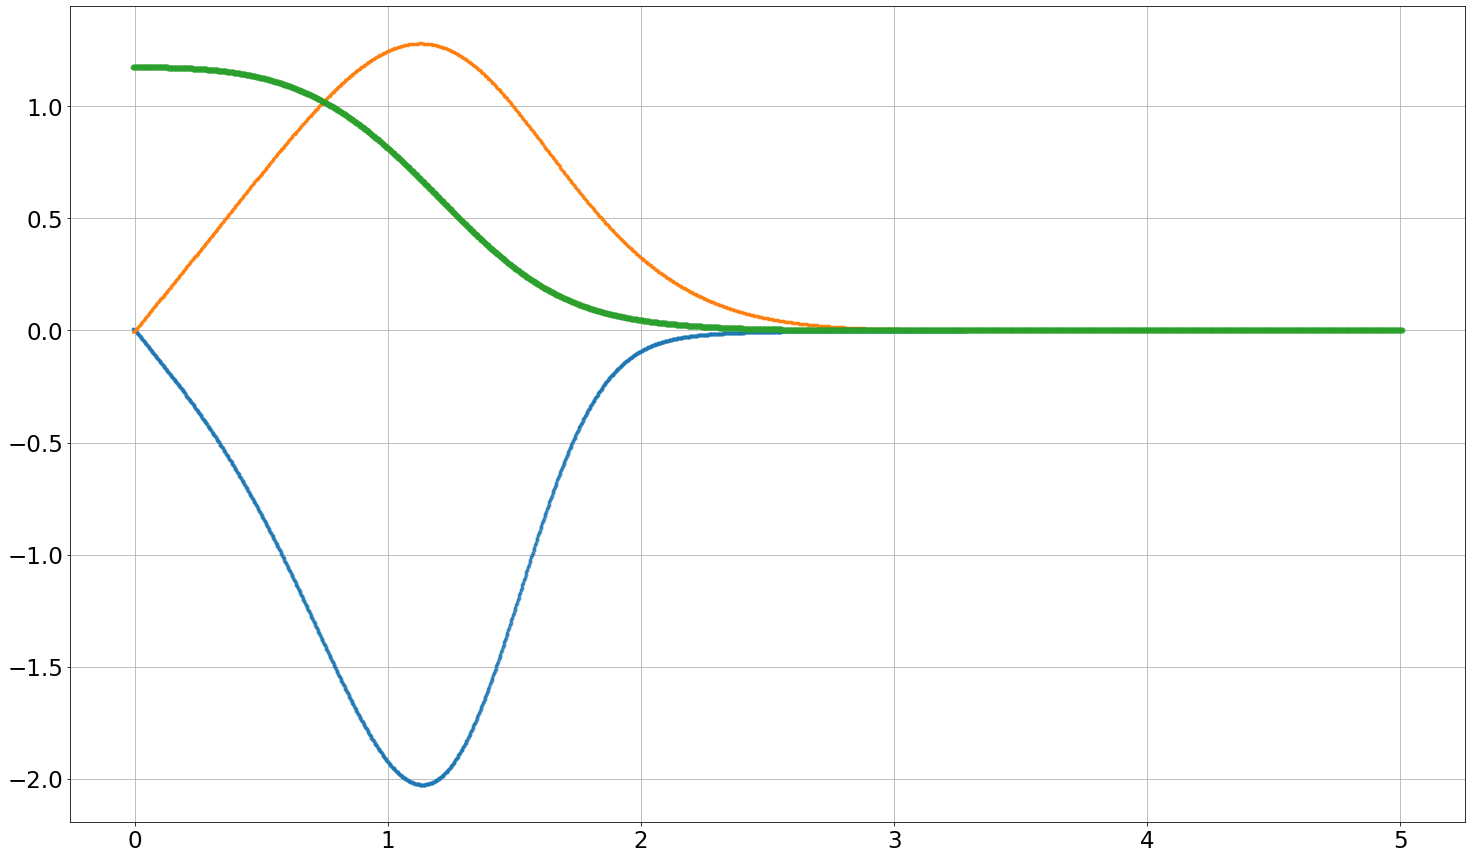

In [11]:
# plot of the initial conditions
for n in range(0,1):
    for i in range(1,2):
            plt.plot(big_DF[n][i][0]['x'],big_DF[n][i][0]['field0'],'.-',alpha=0.7,label="field 0")
            plt.plot(big_DF[n][i][0]['x'],big_DF[n][i][0]['field1'],'.-',alpha=0.7,markersize=5,label="field 1")
            plt.plot(big_DF[n][i][0]['x'],big_DF[n][i][0]['field2'],'.-',alpha=0.7,markersize=10,label="field 2")
            #plt.plot(big_DF[n][i][0]['x'],big_DF[n][i][0]['field3'],'.',alpha=0.7,markersize=10,label="field 2")
            #plt.plot(big_DF[n][i][0]['x'],big_DF[n][i][0]['field4'],'.',alpha=0.7,markersize=10,label="field 2")
            #plt.plot(big_DF[n][i][0]['x'],big_DF[n][i][0]['field5'],'.',alpha=0.7,markersize=10,label="field 2")


#plt.legend()
plt.grid()
#plt.xlim([-1, 5.5])
#plt.ylim([-100000, 10])

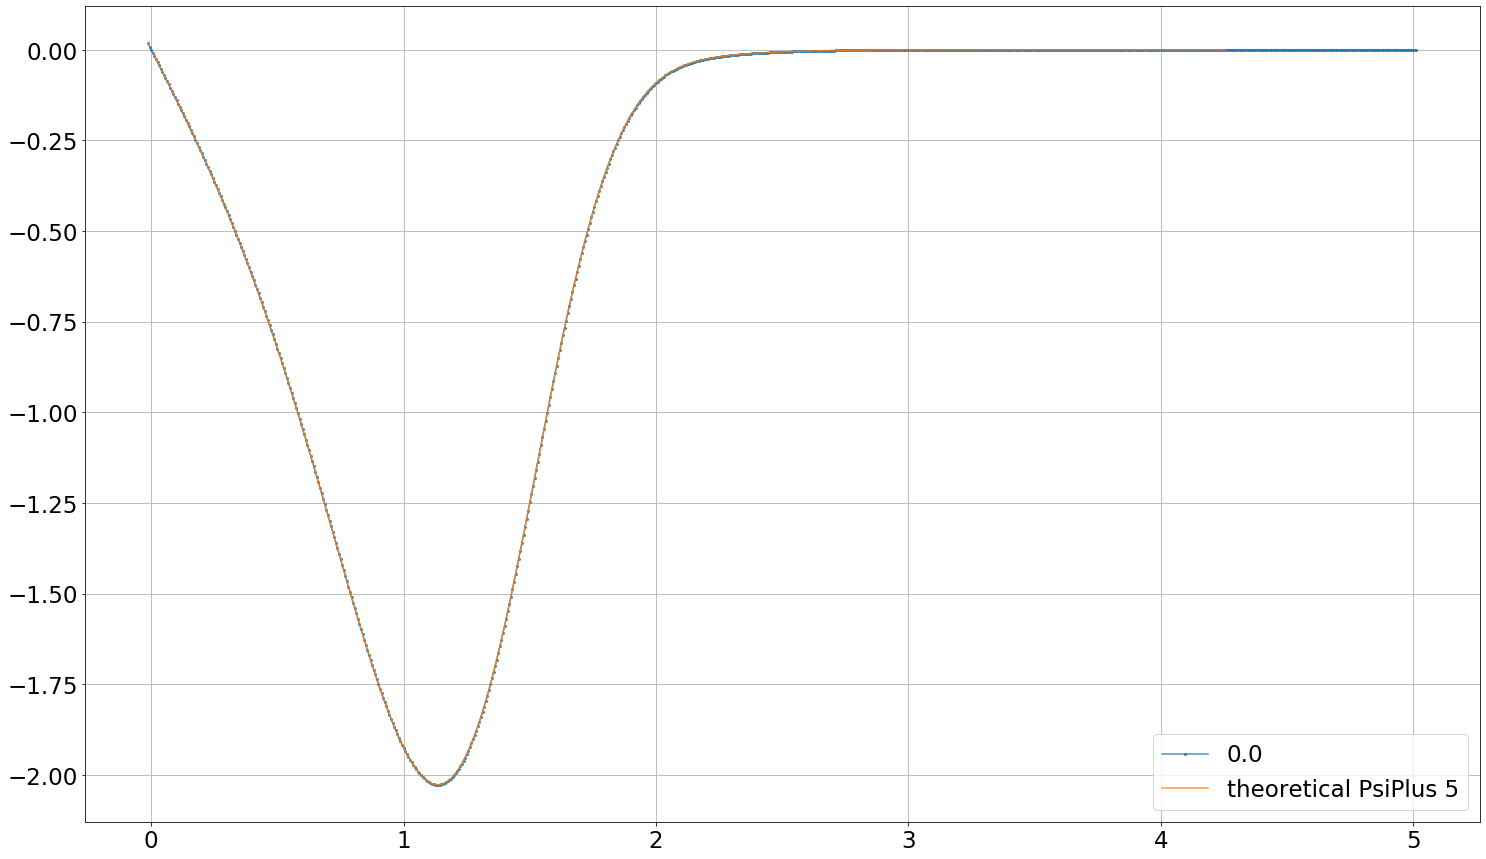

In [13]:
for n in [0]:
    for i in range(0,1):        
        for j in range(0,1):
            plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field0'],'.-',alpha=0.8,markersize=4,label=times[j])
            #plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field1'],'*-',alpha=0.5,markersize=4,label=epsilon[n])
            #plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field2'],'.-',alpha=0.75,markersize=4,label="Psi")
            #plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field3'],alpha=0.8,markersize=8,label=times[j])
            #plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field4'],alpha=0.8,markersize=8,label=times[j])
            #plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field5'],alpha=0.8,markersize=8,label="5")
            #plt.plot(big_DF[n][i][j]['x'],model3_gaussian_solution(big_DF[n][i][j]['x'],times[j],float(amplitude_vector[0])),markersize=5,alpha=0.7,label="teo,time:"+str(times[j]))
            #plt.plot(big_DF[n][i][j]['x'],spherical_we_solution(big_DF[n][i][j]['x'],times[j],1,1))
            #plt.plot(big_DF[n][i][j]['x'],hyperbolic_chi_m1_charvar_solution_Psi(big_DF[n][i][j]['x'],times[j],3,1,0.5,dmax),alpha=0.8,label='theoretical Psi')
            plt.plot(big_DF[n][i][j]['x'],hyperbolic_chi_m1_charvar_solution_PsiPlus(big_DF[n][i][j]['x'],times[j],2.239182,1,1,dmax),alpha=0.8,label='theoretical PsiPlus 5')            
            #plt.plot(big_DF[n][i][j]['x'],hyperbolic_chi_m1_charvar_solution_PsiPlus(big_DF[n][i][j]['x'],times[j],3,1,0.5,dmax),alpha=0.8,label='theoretical PsiPlus 3')
            #plt.plot(big_DF[n][i][j]['x'],hyperbolic_chi_m1_charvar_solution_PsiMinus(big_DF[n][i][j]['x'],times[j],1,1,0.5,dmax),alpha=0.8,label='theoretical PsiMinus')
            #plt.plot(big_DF[n][i][j]['x'],m1_solution_PsiPlus(big_DF[n][i][j]['x'],times[j],1,1),alpha=0.8,label='theoretical Psi')
            #plt.plot(big_DF[n][i][j]['x'],hyperbolic_chi_we_solution(big_DF[n][i][j]['x'],times[j],1,1/5,dmax),'+',alpha=0.5,label='theoretical')
            #plt.plot(big_DF[n][i][j]['x'],initial_test(big_DF[n][i][j]['x'],times[j],1,1./5.,5))
            
plt.grid()
#plt.xlim([0,0.5])
#plt.ylim([ 0.08,0.1] )
#plt.yscale('log')
plt.legend()


In [82]:
scri_signal = []
field = 'field2'
points = [0,500,1000,2000,-3]
for n in [0]:
    for i in range(2,3):
        for point in points:
            scri_signal_point = []
            for j in range(0,len(times)-1):       
                scri_signal_point.append(np.array(big_DF[n][i][j][field])[point])
            scri_signal.append(scri_signal_point)

0 0
1 500
2 1000
3 2000
4 -3


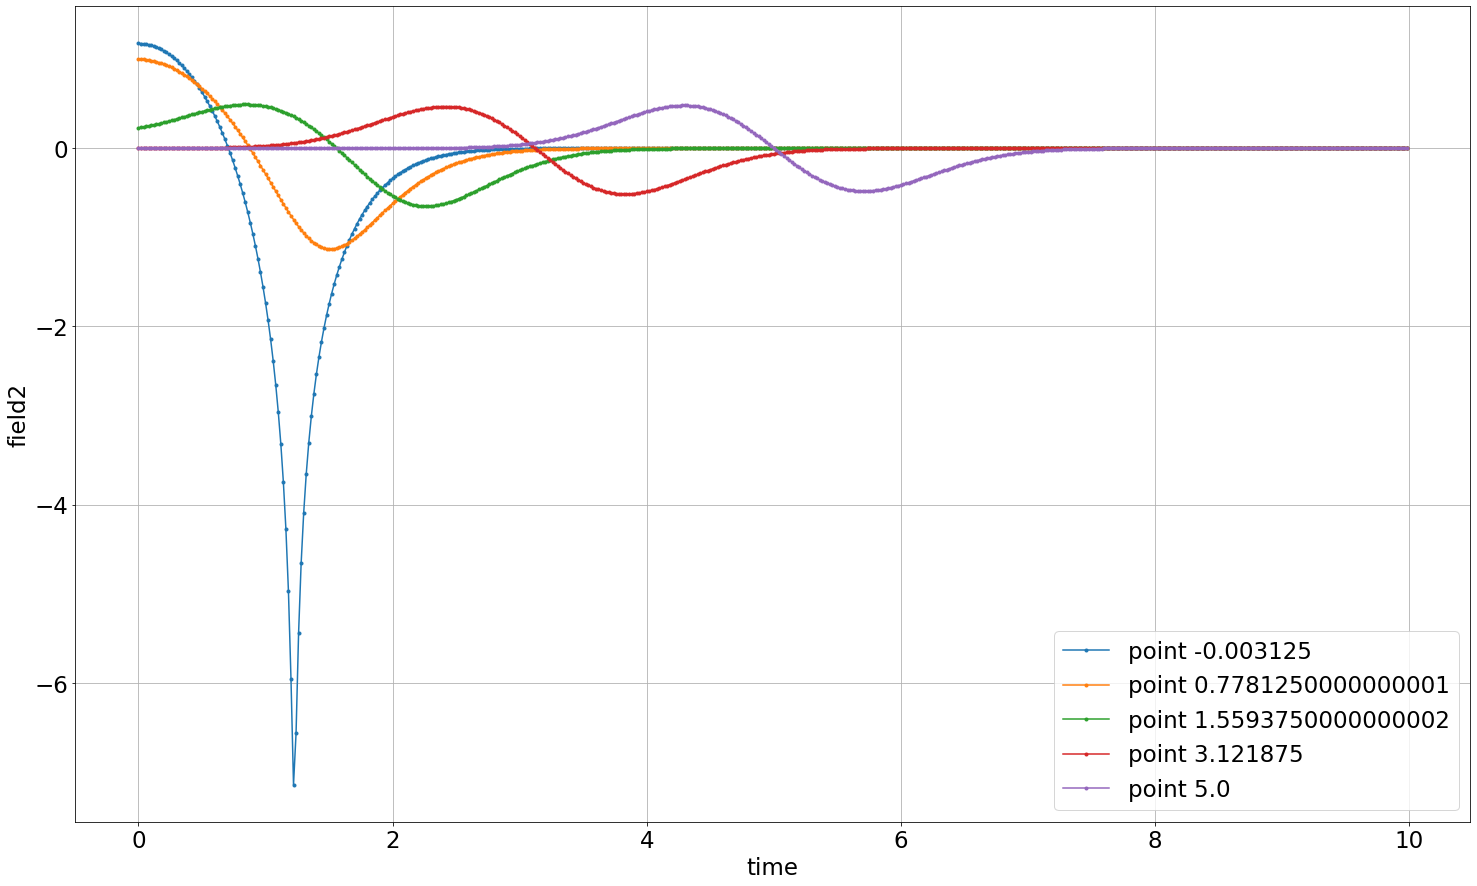

In [83]:
for n in [0]:
    for i in range(2,3):
        for k,p in enumerate(points):
            print(k,p)    
            plt.plot(times[0:-1],scri_signal[k],'.-',label="point "+str(np.array(big_DF[n][i][j]['x'])[p]))
plt.xlabel("time")
plt.ylabel(field)
plt.grid()
plt.legend()

## Convergence test and out put

### Self convergence test

/home/giulio/Università/Thesis/code/data/hyperboloidal_model1/python_analysis.py:75: RuntimeWarning: invalid value encountered in double_scalars
  return(np.log(norm_diff_1/norm_diff_2)/np.log(2.0))


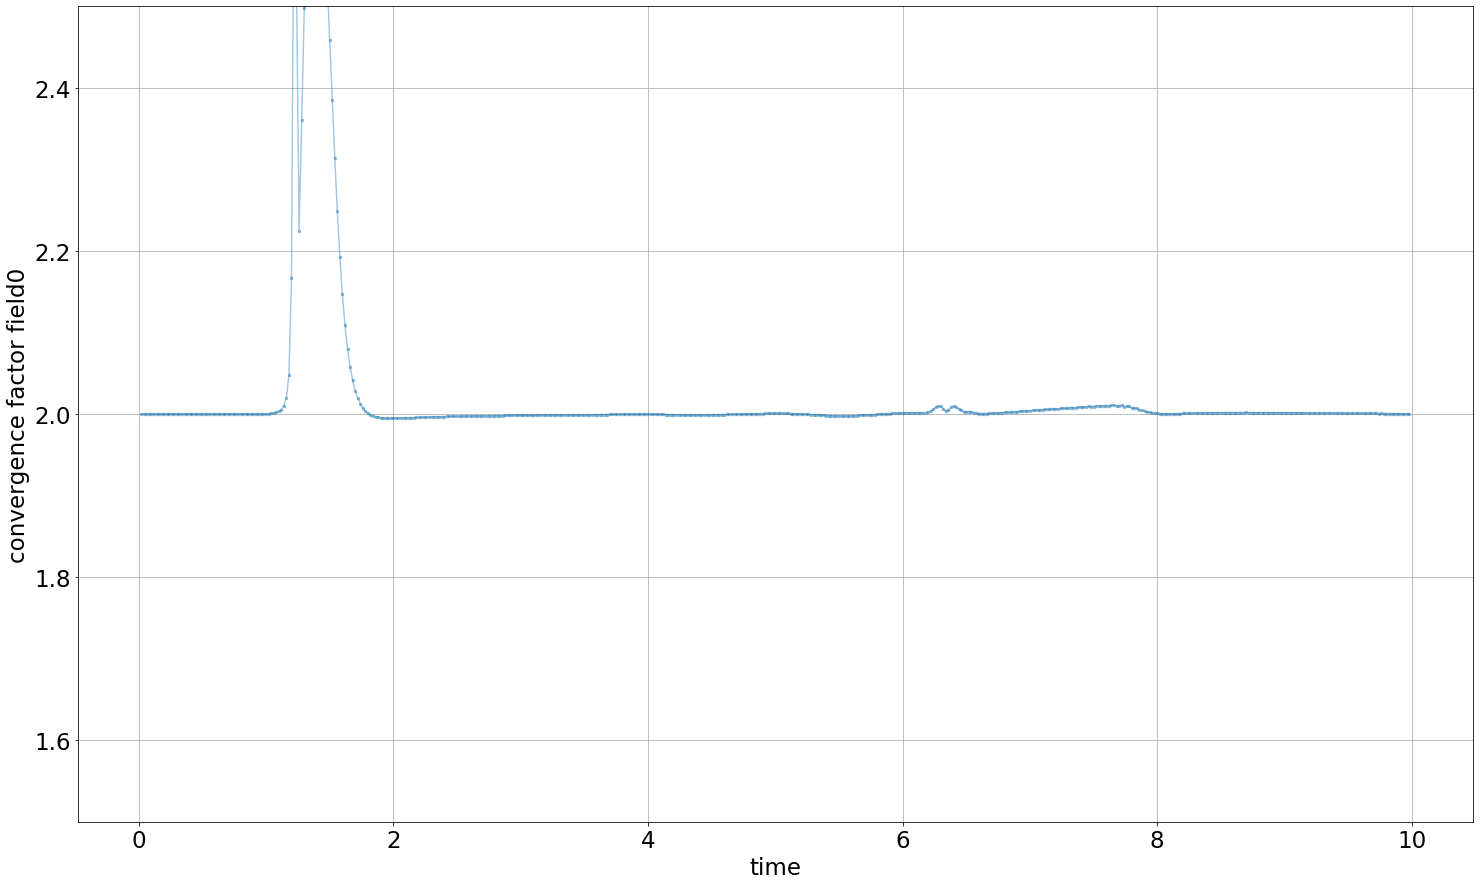

In [7]:
allruns_self_conv_test_vect = []
self_conv_test_vect = []
field = "field0"

for n in [0]:
    self_conv_test_vect = []
    for i,t in enumerate(times[0:-1]):
        self_conv_test_vect.append( self_conv_test_spherical(big_DF[n][0][i],big_DF[n][1][i],big_DF[n][2][i],gl,gr,field) )
        
    allruns_self_conv_test_vect.append(self_conv_test_vect)
    plt.plot(times[0:-1], self_conv_test_vect,'.-',markersize=5,alpha=0.4)
#plt.xlim(0,30)
plt.ylim(1.5,2.5)
plt.xlabel('time')
plt.ylabel('convergence factor '+ field)
plt.xlabel('time')
#plt.vlines(0.652,0,5,alpha=0.5,label="time = 9.4")
#plt.hlines(2,0,12,alpha=0.5,label="time = 9.4")

plt.grid()
#plt.legend()

### Pointwise convergence
The function self_conv_test compute a difference vector between the resolution 0 and 1, and 4 times a difference vector between resolution 1 and 2. The two vector should theoretically coincide.

In [299]:
n_ind = 0
field = "field0"
self_conv_test_vect_pw = []
for j in range(0,number_steps-1):
    self_conv_test_vect_pw.append(self_conv_test_pw(big_DF[n_ind][0][j], big_DF[n_ind][1][j], big_DF[n_ind][2][j],gl,gr,field))
    #plt.plot(big_DF[n_ind][0][0]['x'][gl:-gr],self_conv_test_vect_pw[j][0]-self_conv_test_vect_pw[j][1],markersize=15)
    #plt.hlines(np.mean(self_conv_test_vect_pw[j]),-5,5,alpha=0.4)

#plt.plot(times,self_conv_test_vect_pw,label="conv_test")
#plt.xlim(-3.5,-3.7)
#plt.ylim(1.95,2.1)
#plt.xlabel('time')
#plt.ylabel('pointwise convergence factor')
#plt.grid()
#plt.legend()
#print(self_conv_test_vect_pw[-24])

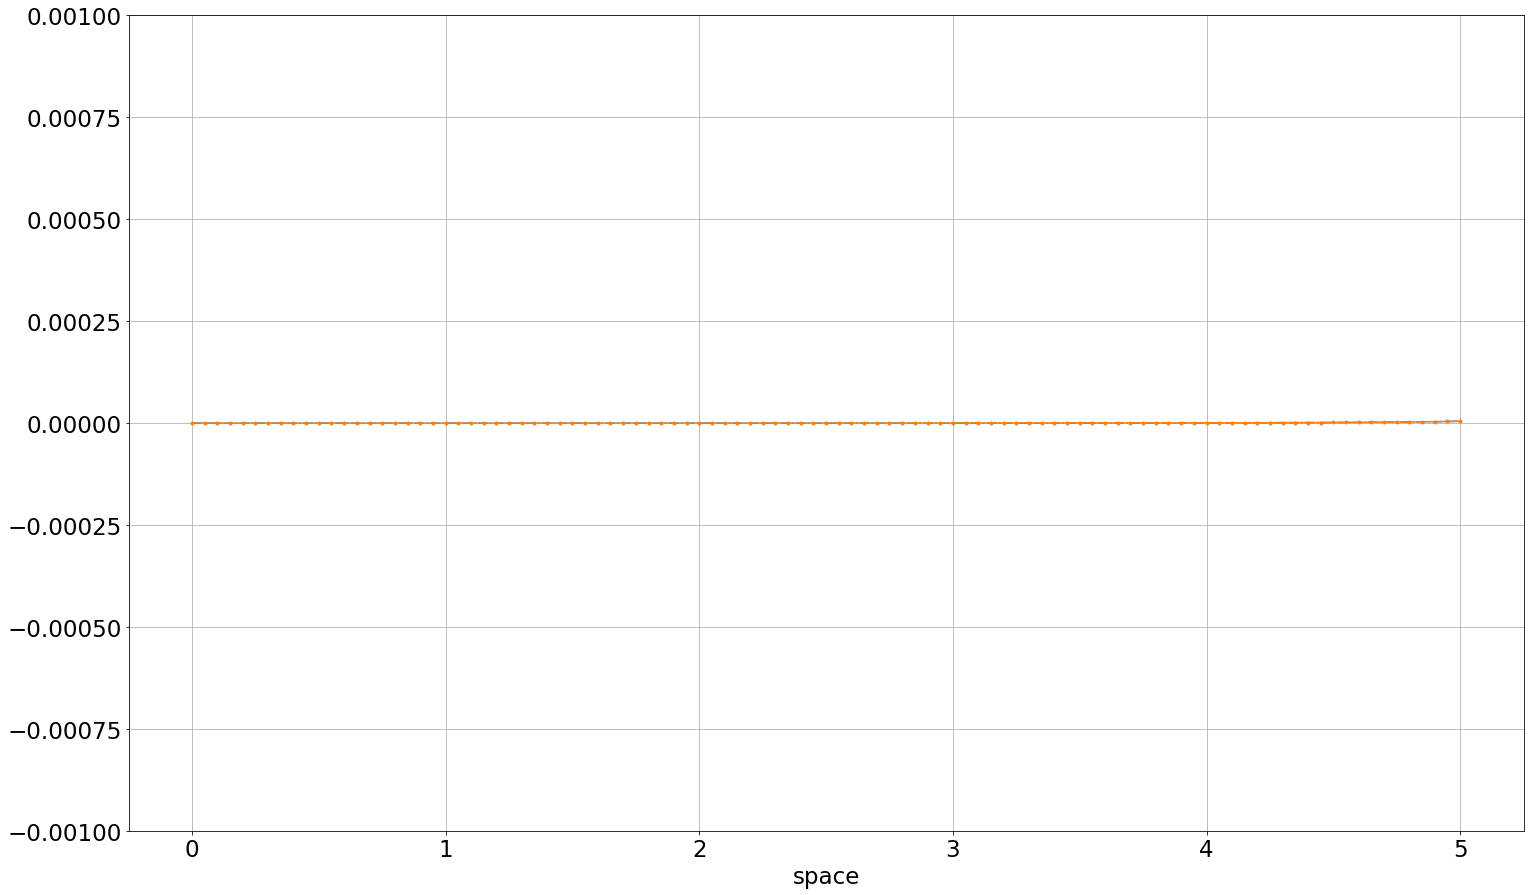

In [300]:
ylim_inf = -0.001
ylim_sup = 0.001
plot_pw_convergence(big_DF,gl,gr,self_conv_test_vect_pw,model,data,field,epsilon,n_ind,dx,number_steps,ylim_inf,ylim_sup)

## Evolutions' videos of the functions

### Animation of a singular field

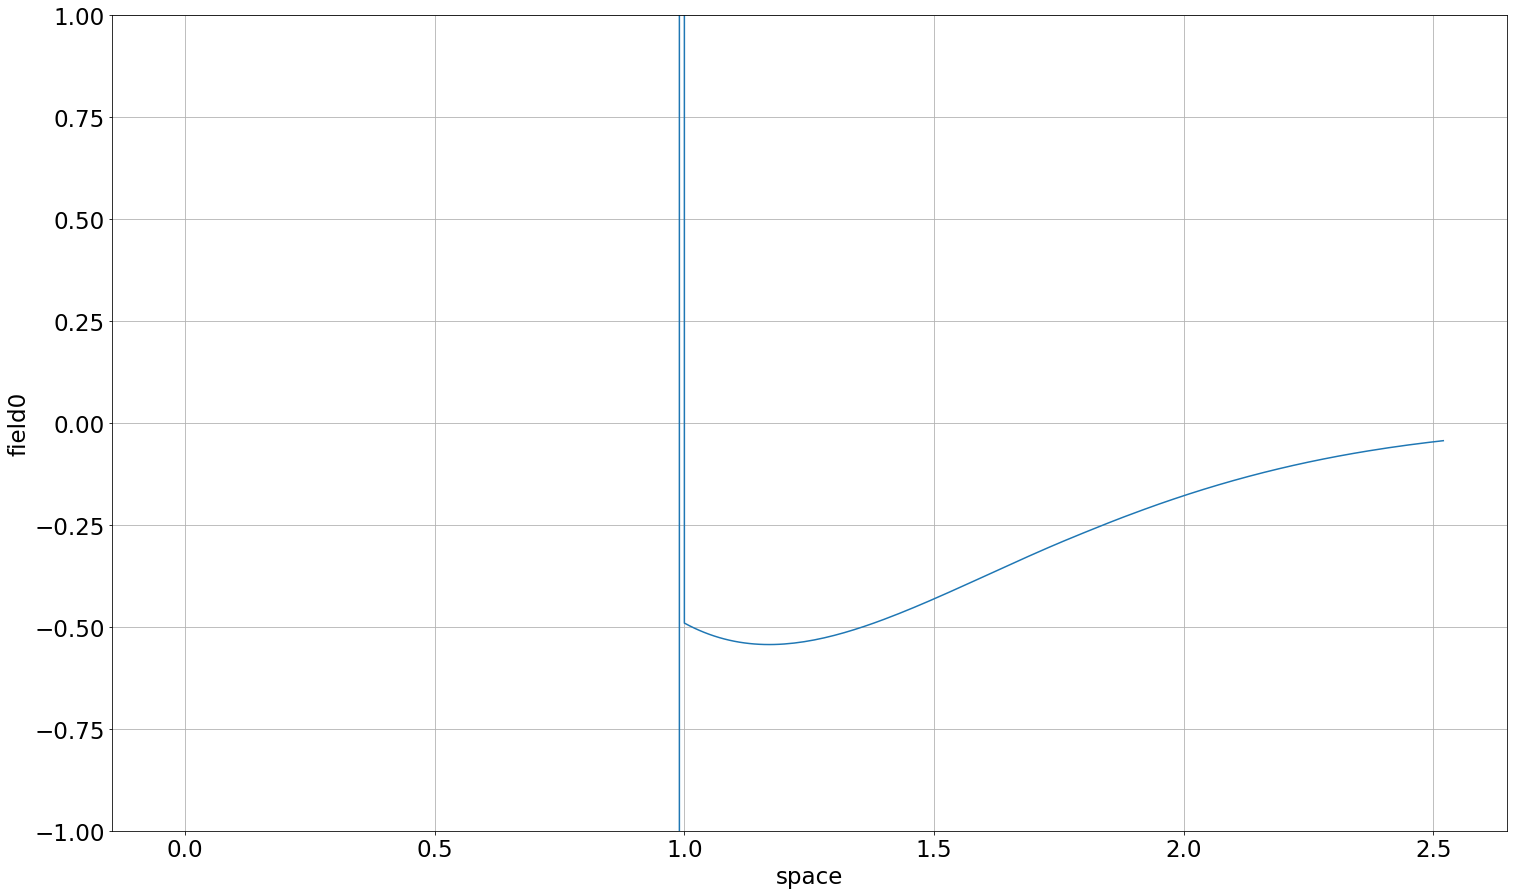

In [9]:
ylim_inf = -1
ylim_sup = 1
field_number = 0
h_ind = 0
big_DF_ind = 0
animate_one_field(field_number,h_ind,big_DF_ind,model,data,big_DF,ylim_inf,ylim_sup,number_steps)

### Animation of multiple fields

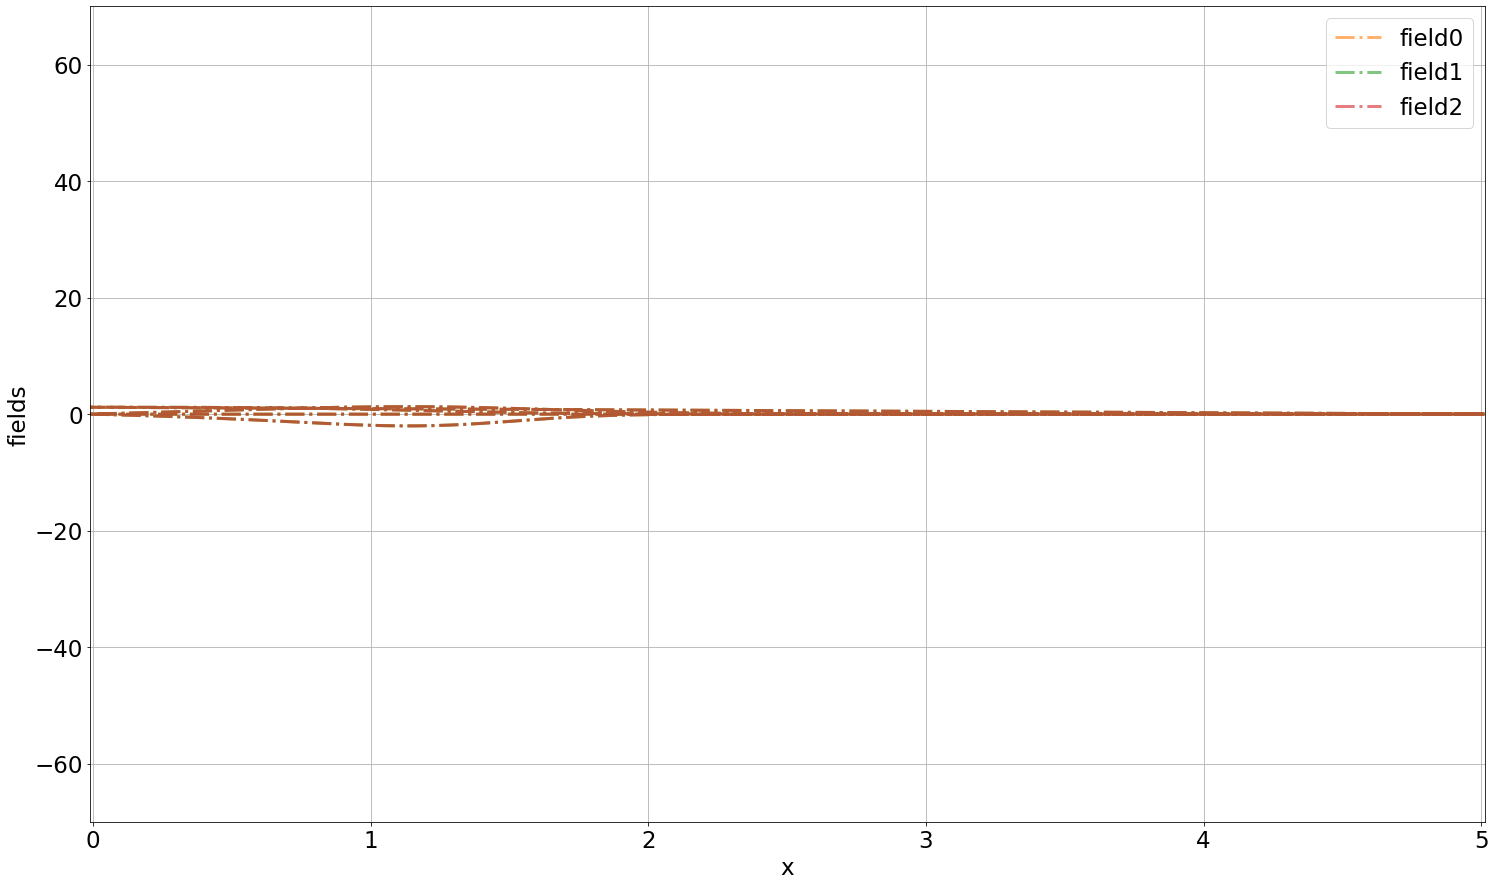

In [13]:
fields_to_print = ["field0","field1","field2"]
ylim_inf = -70
ylim_sup = 70
h_ind = 0
big_DF_ind = 0
animate_multiple_fields(big_DF,fields_to_print,h_ind,big_DF_ind,model,data,dx,gl,gr,ylim_inf,ylim_sup,number_steps,domain_lenght)

### Theoretical comparisons

In [11]:
def theoretical_comparison(big_DF,theoretical_function,fields_to_print,h_ind,big_DF_ind,model,data,dx,gl,gr,number_steps,domain_lenght,ylim_inf,ylim_sup,times,amplitude_vector,ds):
    data_name = "./data"+str(data[0])+"/theoretical_comparison.mp4"
    fig = plt.figure()
    ax1 = plt.axes(ylim=(ylim_inf,ylim_sup),xlim=(-float(dx)*gl,domain_lenght+float(dx)*gr))
    line, = ax1.plot([], [])
    plt.xlabel('x')
    plt.ylabel('fields')
    plotlays = [fields_to_print]
    lines = []
    for index in (fields_to_print[0:-1]):
        lobj = ax1.plot([],[],'+',lw=3,alpha=0.6,label=index)[0]
        lines.append(lobj)
    lobj = ax1.plot([],[],lw=3,alpha=0.6,label="theoretical solution")[0]
    lines.append(lobj)

    x = []
    y = []
    for i in (fields_to_print[0:-1]):
        x.append([big_DF[big_DF_ind][h_ind][0]['x']]),
        y.append([ big_DF[big_DF_ind][h_ind][0][i]])

    x.append([big_DF[0][h_ind][0]['x']]),
    y.append([theoretical_function(big_DF[big_DF_ind][h_ind][0]['x'],times[0],float(amplitude_vector[big_DF_ind]),1,ds,domain_lenght)])
    #y.append([hyperbolic_chi_we_solution(big_DF[big_DF_ind][h_ind][0]['x'],times[0],1,0.5,domain_lenght)])

    def init():
        for line in lines:
            line.set_data(x,y)      
            #line.set_data([x1,x2,x3,x4,x5,x6,x7],[y1,y2,y3,y4,y5,y6,y7])
        return lines





    def animate(i):
        for n,j in enumerate (fields_to_print[0:-1]):
            x[n] = big_DF[big_DF_ind][h_ind][0]['x']
            y[n] = big_DF[big_DF_ind][h_ind][i][j]
        x[1] = big_DF[big_DF_ind][h_ind][0]['x']
        #y[1] = theoretical_function(big_DF[big_DF_ind][h_ind][0]['x'],times[i],float(amplitude_vector[big_DF_ind]))
        y[1] = theoretical_function(big_DF[big_DF_ind][h_ind][0]['x'],times[i],float(amplitude_vector[big_DF_ind]),1,ds,domain_lenght)

        xlist = x
        ylist = y

        #for index in range(0,1):
        for lnum,line in enumerate(lines):
            line.set_data(xlist[lnum], ylist[lnum]) # set data for each line separately. 

        return lines

    # call the animator.  blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=int(number_steps-1), interval=50, blit=True)
    plt.legend()
    plt.grid()
    plt.show()
    anim.save(data_name)

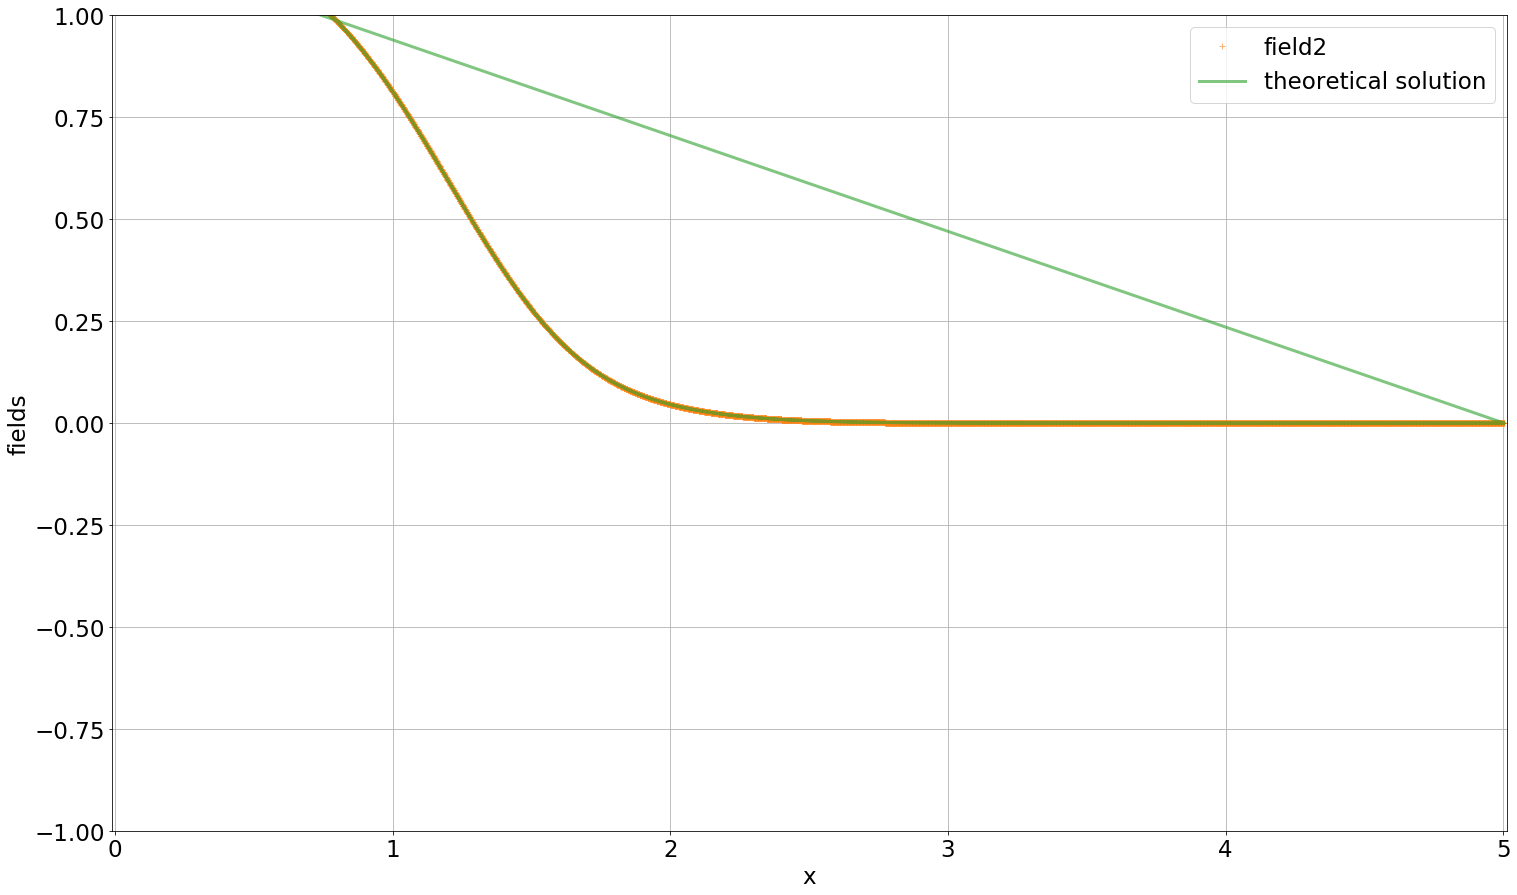

In [12]:
fields_to_print = ["field2","theoretical"]
h_ind = 2
big_DF_ind = 0
ylim_inf = -1
ylim_sup = 1
ds = 1
theoretical_comparison(big_DF,hyperbolic_chi_m1_charvar_solution_Psi,fields_to_print,h_ind,big_DF_ind,model,data,dx,gl,gr,number_steps,domain_lenght,ylim_inf,ylim_sup,times,amplitude_vector,ds)

## Plot of the power law scaling for the CSS and DSS models

In [427]:
ds = 1
Ac = -np.exp((3/2))/(1-2*(3/2))
tc = (3/2)**0.5/ds
print ("critical amplitude Ac =",Ac," critical time tc =",tc)

critical amplitude Ac = 2.2408445351690323  critical time tc = 1.224744871391589


In [263]:
# we compute the maximums over all times for each run (they have different initial amplitude)
maximums = runs_maximums_vector(big_DF,2,'field0')
amplitudes_vector = []
for n in range(int(len(names)/4)):
    amplitudes_vector.append(float(names[4*n][25:33]))
print('amplitudes:',amplitudes_vector)
for i in range(len(amplitudes_vector)):
    amplitudes_vector[i] = Ac - amplitudes_vector[i]
amplitudes_for_fit = -np.log(amplitudes_vector[:]).reshape((-1, 1))
line_model = LinearRegression()
print(len(amplitudes_for_fit))
line_model.fit(amplitudes_for_fit,np.log(maximums))
print("maximum",maximums)
print('intercept:',line_model.intercept_,'angular coefficient', line_model.coef_)

amplitudes: [2.222528, 2.225848, 2.228567, 2.230792, 2.232614, 2.234106, 2.235327]
7
maximum [20.694495296368586, 22.975501326076923, 25.39051056799207, 28.22991441195162, 31.37598533744949, 34.52180308899645, 38.86679094080874]
intercept: 0.9448515513261979 angular coefficient [0.52090551]


Text(0, 0.5, 'maximum PI overall times')

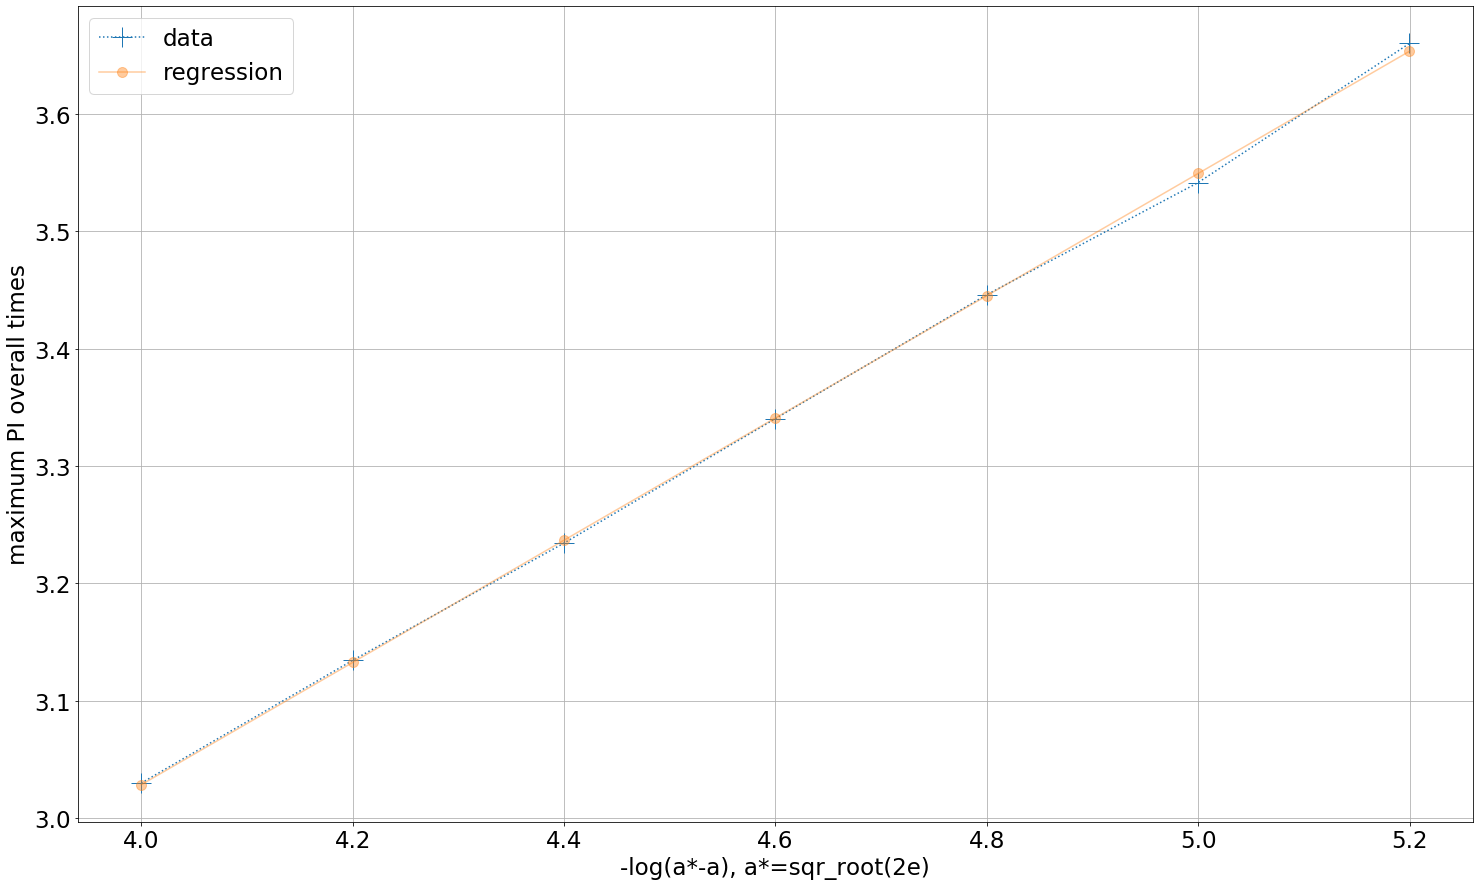

In [264]:
plt.plot(-np.log(amplitudes_vector),np.log(maximums),'+:',markersize=20,alpha=1,label='data')
plt.plot(-np.log(amplitudes_vector),line_model.predict(-np.log(amplitudes_vector).reshape(-1,1)),'.-',markersize=20,alpha=0.4,label='regression')
plt.grid()
plt.legend()
plt.xlabel('-log(a*-a), a*=sqr_root(2e)')
plt.ylabel('maximum PI overall times')
#RESULTS: intercept: 0.796531249552912 angular coefficient [0.49825299]

### Production of the amplitudes to analyze

In [189]:
amplitudes_vector_creator(4,8.5,Ac,0.2)


array([2.2225289 , 2.22584896, 2.2285672 , 2.2307927 , 2.23261479,
       2.23410659, 2.23532797, 2.23632795, 2.23714667, 2.23781698,
       2.23836578, 2.2388151 , 2.23918298, 2.23948417, 2.23973076,
       2.23993265, 2.24009795, 2.24023328, 2.24034408, 2.2404348 ,
       2.24050907, 2.24056988, 2.24061967])

In [14]:
 2.236327 needs  0.00625,  

9.326575926388497